In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report 

In [2]:
X = pd.read_csv(r'C:\Users\ply58\OneDrive\Tài liệu\PythonML\Github Repositories\Python_ML\Decision Tree\X.csv')
y = pd.read_csv(r'C:\Users\ply58\OneDrive\Tài liệu\PythonML\Github Repositories\Python_ML\Decision Tree\y.csv')

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [6]:
model = DecisionTreeClassifier()

In [7]:
model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [8]:
base_preds = model.predict(X_test)

In [11]:
print(classification_report(y_test, base_preds))

              precision    recall  f1-score   support

      Adelie       0.98      1.00      0.99        41
   Chinstrap       1.00      0.96      0.98        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.99       101
   macro avg       0.99      0.99      0.99       101
weighted avg       0.99      0.99      0.99       101



In [12]:
model.feature_importances_

array([0.33609286, 0.05366774, 0.53120101, 0.        , 0.0681854 ,
       0.        , 0.01085298])

In [13]:
X.columns

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'island_Dream', 'island_Torgersen', 'sex_MALE'],
      dtype='object')

In [15]:
pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

,Feature,Importance
2,flipper_length_mm,0.531201
0,culmen_length_mm,0.336093
4,island_Dream,0.068185
1,culmen_depth_mm,0.053668
6,sex_MALE,0.010853
3,body_mass_g,0.000000
5,island_Torgersen,0.000000


[Text(0.5, 0.9166666666666666, 'flipper_length_mm <= 206.5\ngini = 0.633\nsamples = 233\nvalue = [105, 45, 83]'),
 Text(0.2727272727272727, 0.75, 'culmen_length_mm <= 42.35\ngini = 0.418\nsamples = 147\nvalue = [104, 42, 1]'),
 Text(0.38636363636363635, 0.8333333333333333, 'True  '),
 Text(0.18181818181818182, 0.5833333333333334, 'gini = 0.0\nsamples = 97\nvalue = [97, 0, 0]'),
 Text(0.36363636363636365, 0.5833333333333334, 'island_Dream <= 0.5\ngini = 0.274\nsamples = 50\nvalue = [7.0, 42.0, 1.0]'),
 Text(0.18181818181818182, 0.4166666666666667, 'culmen_depth_mm <= 16.0\ngini = 0.245\nsamples = 7\nvalue = [6, 0, 1]'),
 Text(0.09090909090909091, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.2727272727272727, 0.25, 'gini = 0.0\nsamples = 6\nvalue = [6, 0, 0]'),
 Text(0.5454545454545454, 0.4166666666666667, 'culmen_length_mm <= 44.2\ngini = 0.045\nsamples = 43\nvalue = [1, 42, 0]'),
 Text(0.45454545454545453, 0.25, 'sex_MALE <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [1, 4,

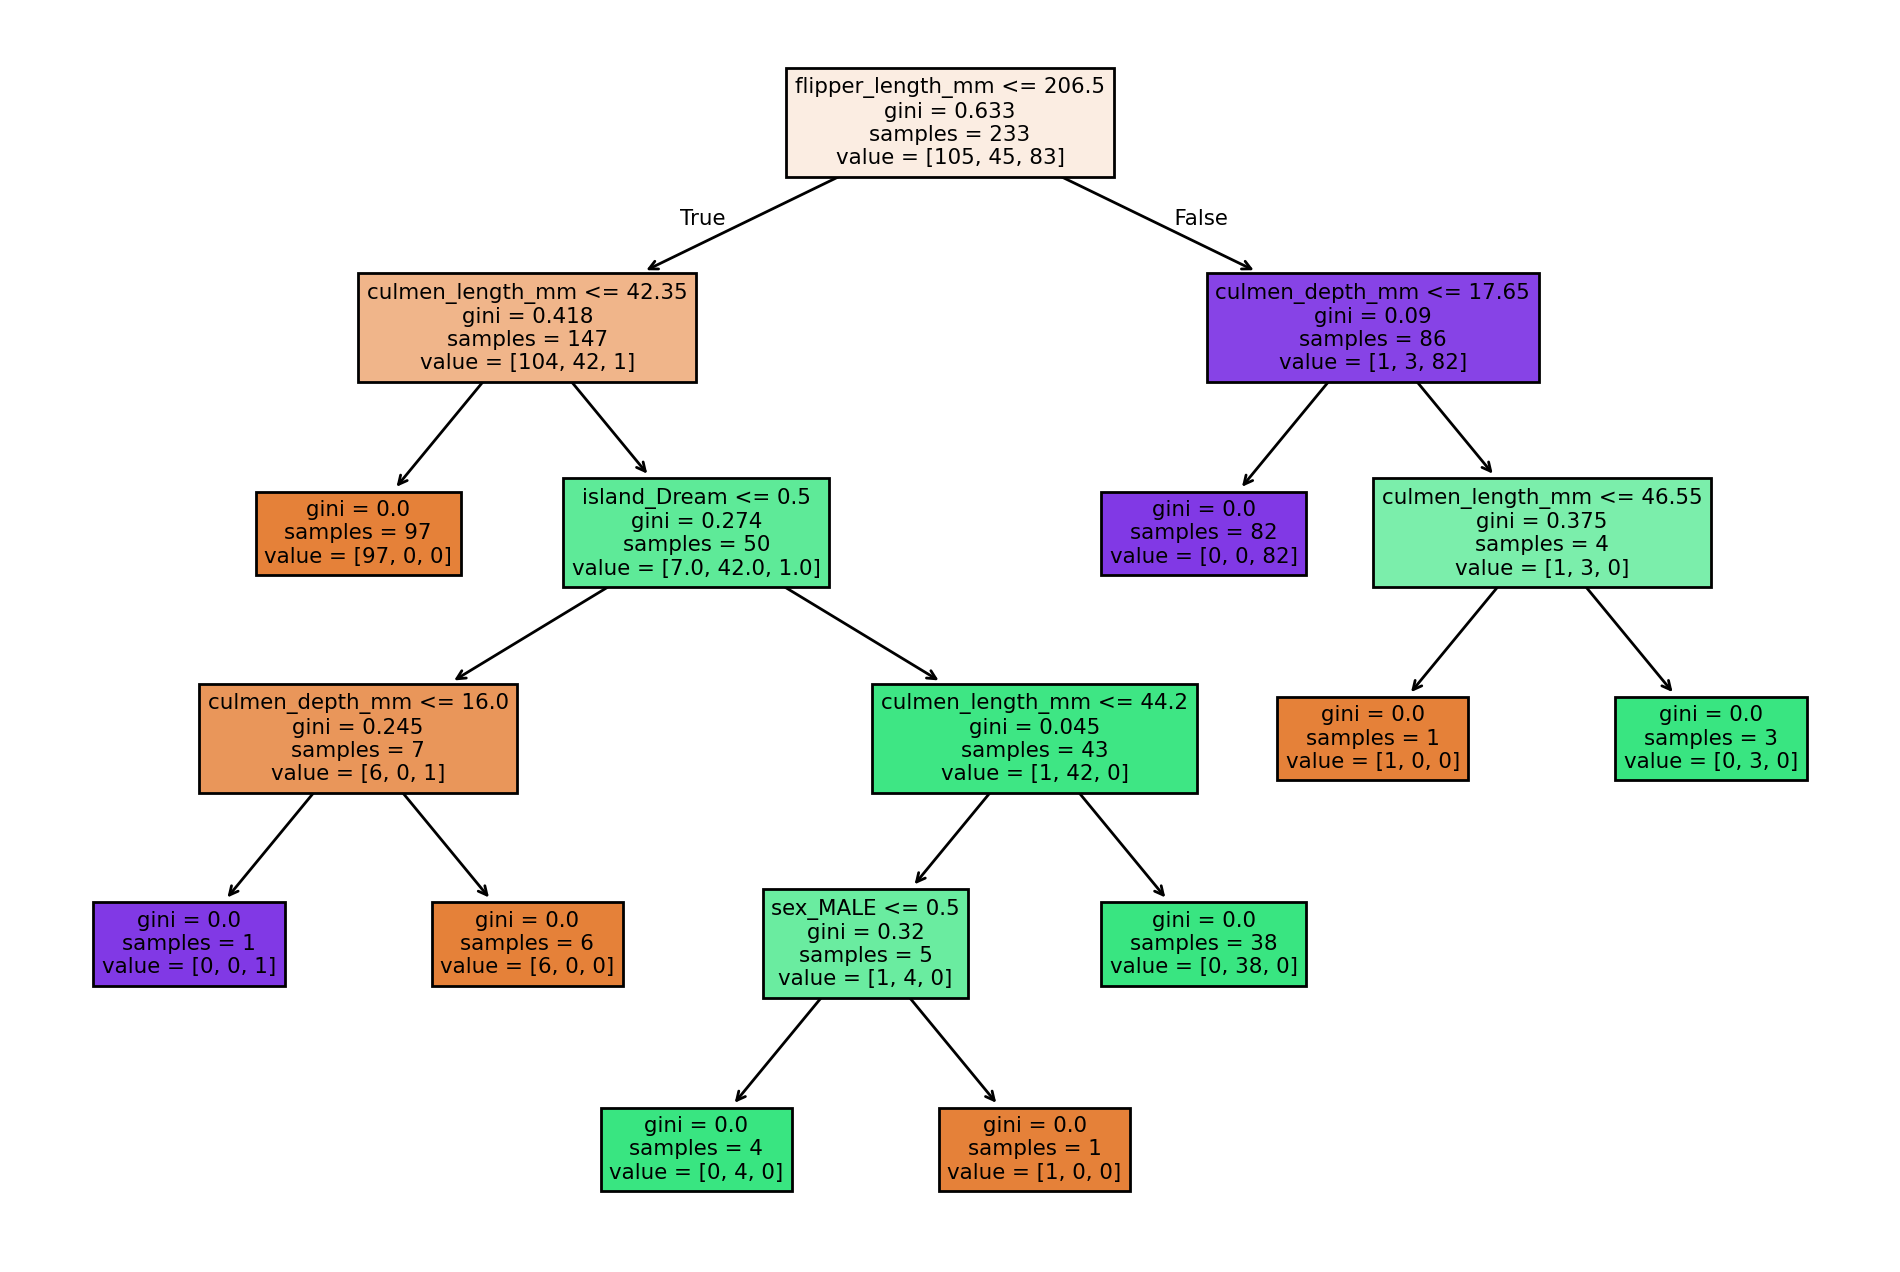

In [18]:
plt.figure(figsize=(12,8), dpi=200)
plot_tree(model, feature_names=X.columns, filled=True)

In [19]:
def report_tree(model, X_test):
    model_preds = model.predict(X_test)
    print(classification_report(y_test, model_preds))
    print('\n')
    plt.figure(figsize=(12,8), dpi=200)
    plot_tree(model, feature_names=X.columns, filled=True)

              precision    recall  f1-score   support

      Adelie       0.98      1.00      0.99        41
   Chinstrap       1.00      0.96      0.98        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.99       101
   macro avg       0.99      0.99      0.99       101
weighted avg       0.99      0.99      0.99       101





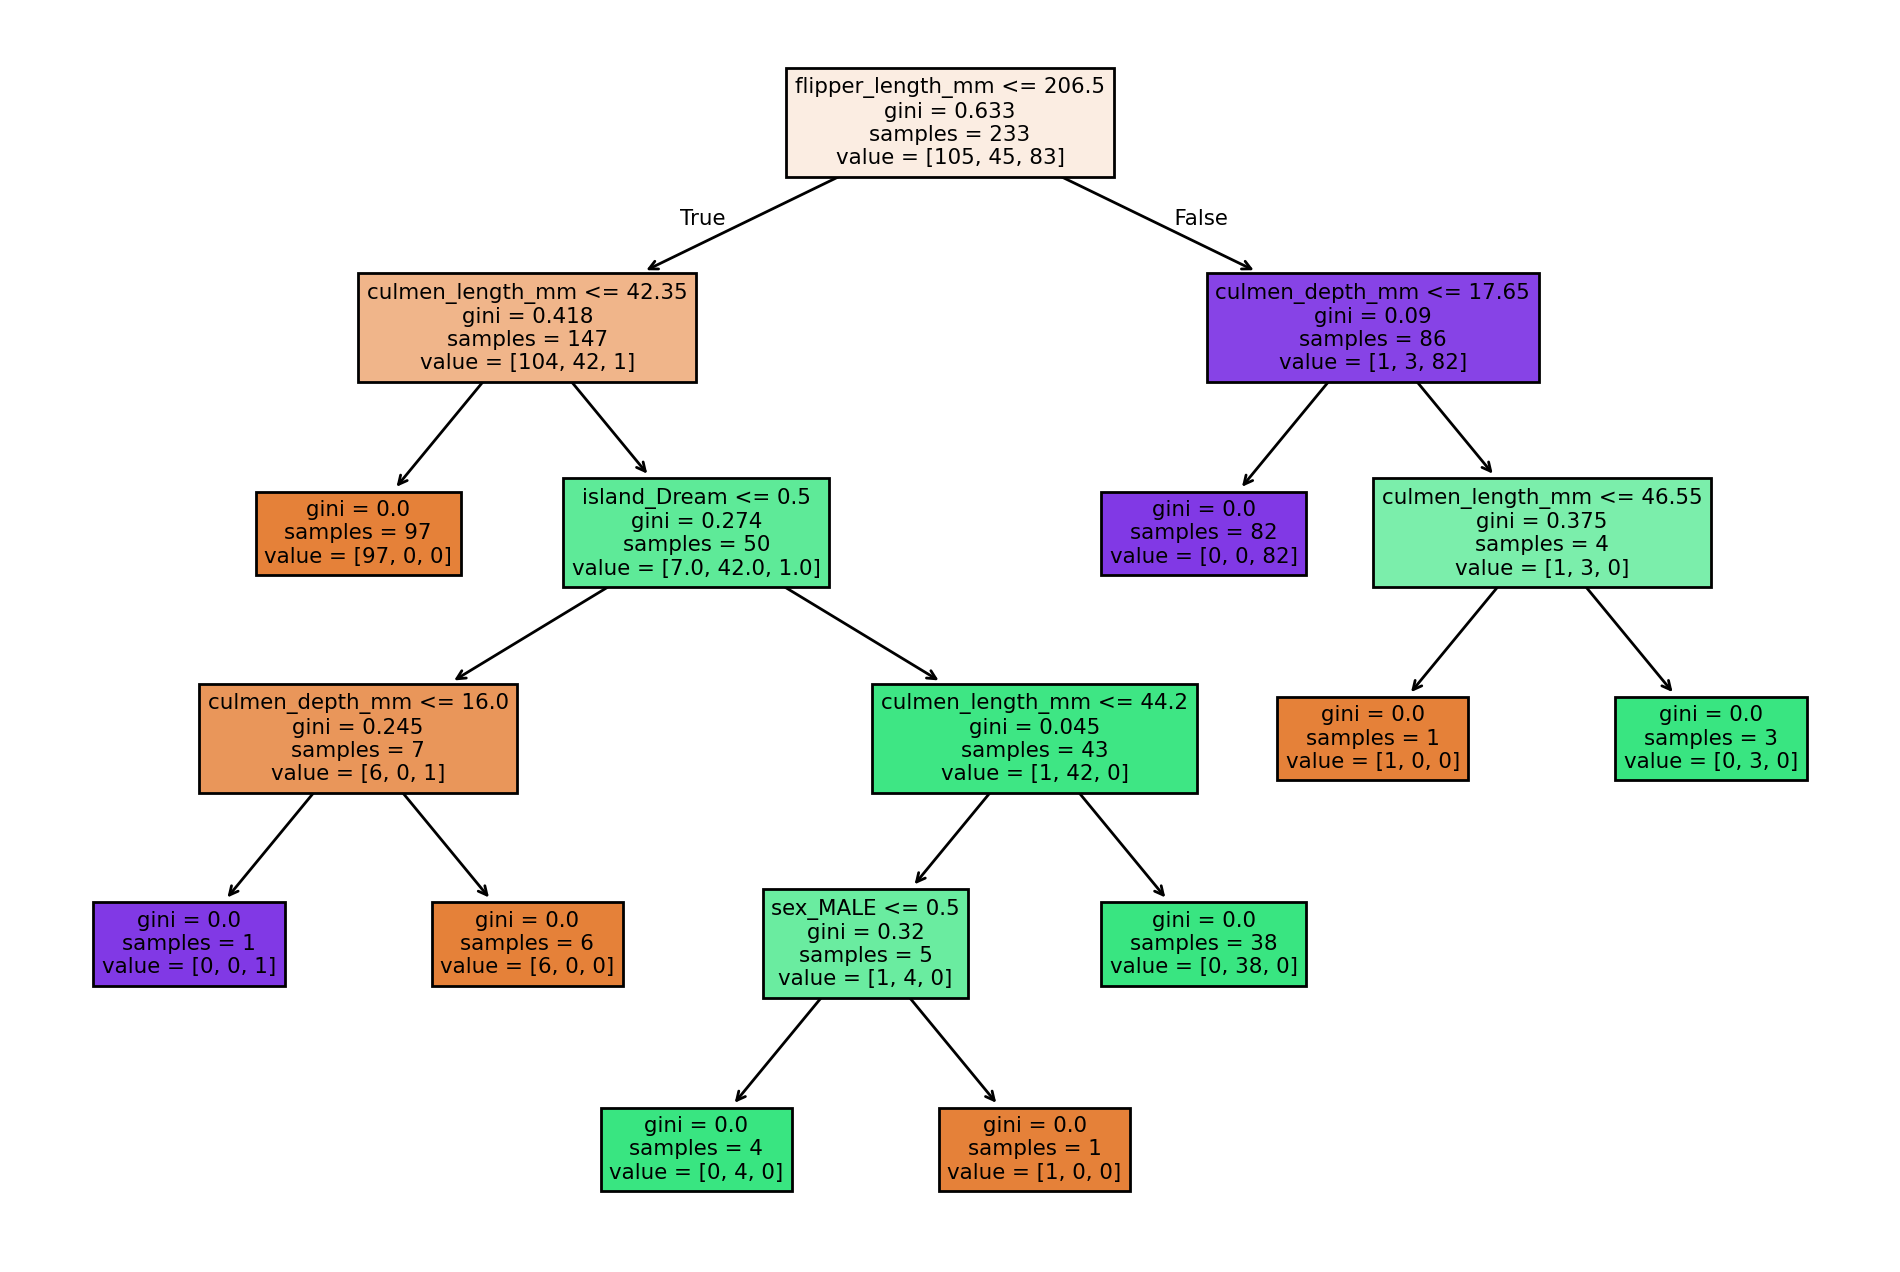

In [21]:
report_tree(model, X_test)

In [22]:
entropy_tree = DecisionTreeClassifier(criterion='entropy', random_state=42)

              precision    recall  f1-score   support

      Adelie       0.93      1.00      0.96        41
   Chinstrap       1.00      0.87      0.93        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.98      0.96      0.96       101
weighted avg       0.97      0.97      0.97       101





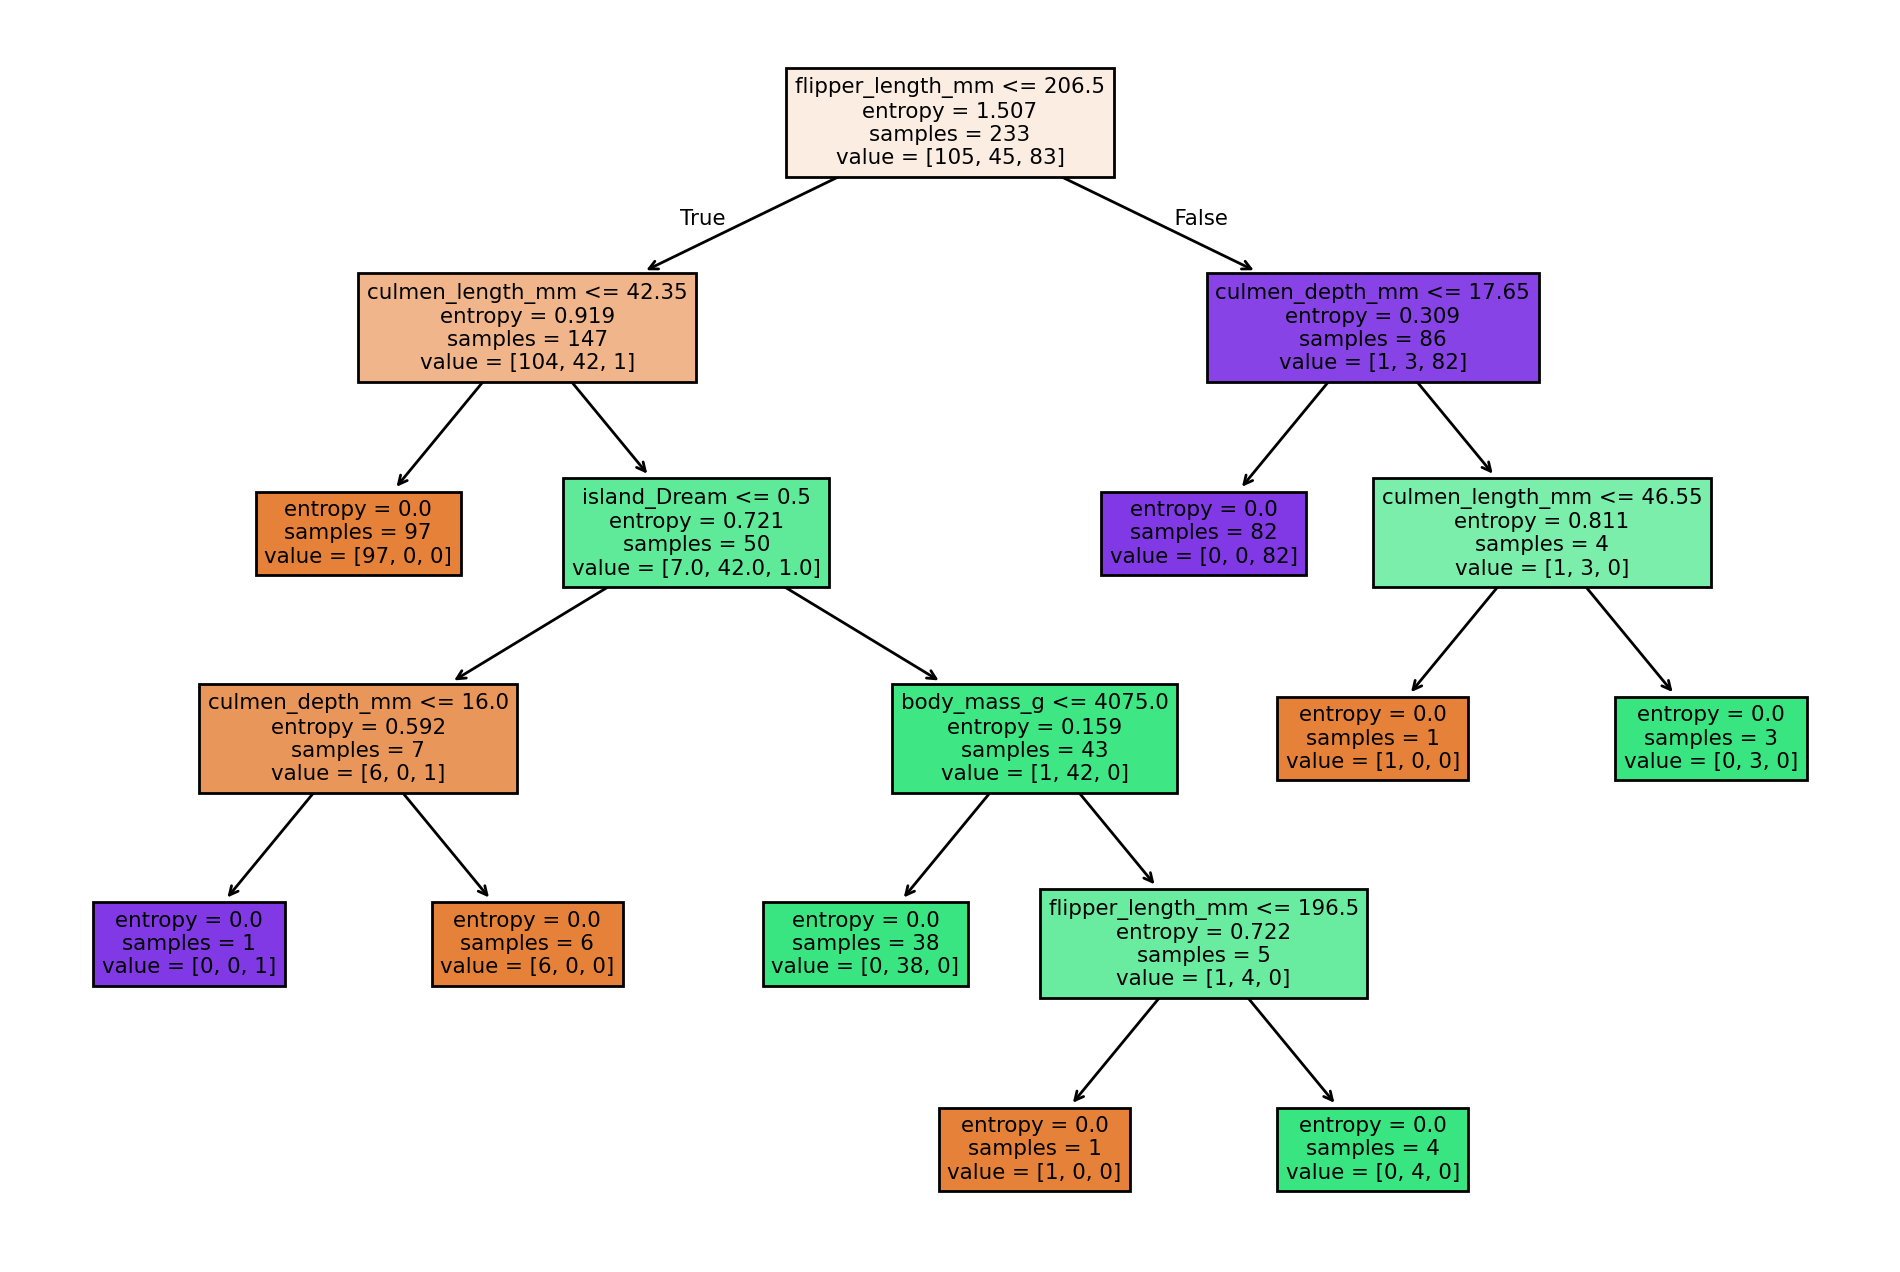

In [23]:
entropy_tree.fit(X_train, y_train)
report_tree(entropy_tree, X_test)